# 利用Pytorch建立第一個簡單的預測模型-波士頓房價預測

本課程主要介紹「如何利用Pytorch建立第一個簡單的預測模型」，這邊模型我們採用最簡單「感知機模型=線性回歸」
Regression by Pytorch、SKlearn、Close-form和MLP<br>

簡單線性回歸(Linear Regression)<br>
單一個自變數(Independent variable)預測依變數(Dependent variable)<br>
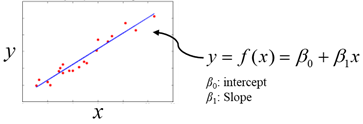

自變數(特徵)變多(假設有d個特徵)的回歸:<br>
$$y=f(X)=\beta_0 + \beta_1 x_1 + + \beta_2 x_2 + ... + + \beta_d x_d$$

感知機模型
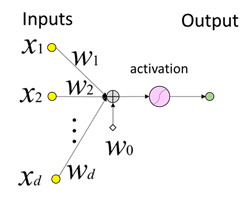

從上圖可以看到當
$w_i = \beta_i, \forall i=0,1,...,d$，感知機的activation frunction關掉，則「感知機模型=線性回歸」。

### 本節課重點<br>
1. 簡單介紹常見的「波士頓房價預測 」<br>
2. 利用Pytorch建立線性回歸進行波士頓房價預測  <br>
3. 利用SKlearn建立線性回歸進行波士頓房價預測 <br>
4. 利用線性回歸的close-form建立模型進行波士頓房價預測 <br>
5. 利用pytorch建立MLP進行波士頓房價預測 <br>



-----------
### 1. 簡單介紹常見的「波士頓房價預測 」<br>
利用SKLearn的datasets模組可以將「波士頓房價預測 」資料庫進行下載和讀取<br>
data： 每個房子的資訊<br>
target： 每個房子的價格<br>
feature_names： 每個房子的特徵<br>
DESCR： 這個資料集的描述<br>

In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_boston
data_boston = load_boston()
print(data_boston.keys())
print('Number of BOSTON data: {}.\nDimension:{}.'.format(data_boston.data.shape[0],data_boston.data.shape[1]))
print('房子的特徵欄位:\n{}'.format(data_boston.feature_names))
print('\n資料集的描述:\n{}'.format(data_boston.DESCR))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
Number of BOSTON data: 506.
Dimension:13.
房子的特徵欄位:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

資料集的描述:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units buil

「波士頓房價預測 」資料的特徵屬性<br>

Attribute Information (in order):
- CRIM     per capita crime rate by town (城鎮人均犯罪率)
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft. (超過 25,000 平方英尺的住宅用地比例為)
- INDUS    proportion of non-retail business acres per town (佔每個城鎮非零售商業英畝的比例)
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million) (一氧化氮濃度（千萬分之一）)
- RM       average number of rooms per dwelling (每間住宅的平均房間數)
- AGE      proportion of owner-occupied units built prior to 1940 (1940 年之前建造的自住單元的 AGE 比例)
- DIS      weighted distances to five Boston employment centres (到波士頓就業中的加權距離)
- RAD      index of accessibility to radial highways (輻射狀公路可達性指數)
- TAX      full-value property-tax rate per US:10,000 (每 10,000 美元徵收全值財產稅) 
- PTRATIO  pupil-teacher ratio by town (按城鎮劃分的 PTRATIO 師生比例)
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  ( Bk:城鎮黑人的比例)
- LSTAT    lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's  (自用住宅中位數)

## 2. 利用Pytorch建立簡單線性回歸進行波士頓房價預測  <br>

Pytorch訓練流程<br>
1. 讀資料(dataset和dataloader)<br>
2. 建立模型: $y=f(X)=\beta_0 + \beta_1 x_1 + + \beta_2 x_2 + ... + + \beta_{13} x_{13}$<br>
3. 宣告/建立loss function<br>
4. 建立模型的參數最佳化器<br>
5. 開始訓練模型<br>

In [10]:
from sklearn.datasets import load_boston
import torch
import numpy as np
import torchvision.transforms.functional as FT
from torchvision import transforms
import torch.nn as nn
from sklearn.model_selection import train_test_split

def load_boston_sklearn():
    X, Y = load_boston(return_X_y=True)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2022)
    return  X_train, X_test, Y_train, Y_test

use_cuda=0
device = torch.device("cuda" if use_cuda else "cpu")


# Step 1: data loader
X_train, X_test, Y_train, Y_test = load_boston_sklearn()
X_train = torch.tensor(X_train, dtype=torch.float)
Y_train = torch.tensor(Y_train, dtype=torch.float).view(-1, 1)
mydatasets = torch.utils.data.TensorDataset(X_train, Y_train)
dataloader_train = torch.utils.data.DataLoader(mydatasets, batch_size=50, shuffle=True)

# Step 2: model 
w_num = X_train.shape[1]
model = torch.nn.Sequential(
    torch.nn.Linear(w_num, 1)
)
model=model.to(device)

# step 3: loss function
loss = torch.nn.MSELoss().to(device)

# step4. optimator
optimizer_lr = torch.optim.Adam(model.parameters(), lr=0.01)
# optimizer_lr = torch.optim.SGD(model.parameters(),momentum=0.9, lr=0.00001)

# step 5. model training
total_epoch=1000
plt_loss_train=[]
for epoch in range(total_epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(dataloader_train):
        data, target = data.to(device), target.to(device)

        output_lr = model(data)
        loss_lr = loss(output_lr,target) 
        
        optimizer_lr.zero_grad()
        loss_lr.backward()
        optimizer_lr.step()
        
        train_loss += loss_lr.cpu().detach().numpy()
    train_loss /= len(dataloader_train.dataset)
    plt_loss_train.append(train_loss)
    if epoch%50==0:
        print('Linear Regression [epoch: {}/{}], Average loss (Train):{:.10f}'.format(
            epoch+1, total_epoch, train_loss))
print('training done.')

data = torch.FloatTensor(X_test).to(device)
data = torch.unsqueeze(data, 0)
model.eval()
with torch.no_grad():
    output_lr = model(data)
output_lr = torch.squeeze(output_lr)
output_lr = output_lr.cpu().detach().numpy()

Linear Regression [epoch: 1/1000], Average loss (Train):4.2333473545
Linear Regression [epoch: 51/1000], Average loss (Train):1.0569519855
Linear Regression [epoch: 101/1000], Average loss (Train):0.8300225900
Linear Regression [epoch: 151/1000], Average loss (Train):0.6522902168
Linear Regression [epoch: 201/1000], Average loss (Train):0.6728756168
Linear Regression [epoch: 251/1000], Average loss (Train):1.0420744112
Linear Regression [epoch: 301/1000], Average loss (Train):0.7682078333
Linear Regression [epoch: 351/1000], Average loss (Train):0.6921803880
Linear Regression [epoch: 401/1000], Average loss (Train):0.6267487106
Linear Regression [epoch: 451/1000], Average loss (Train):0.5816680134
Linear Regression [epoch: 501/1000], Average loss (Train):0.4668394062
Linear Regression [epoch: 551/1000], Average loss (Train):0.9865298814
Linear Regression [epoch: 601/1000], Average loss (Train):0.5236974978
Linear Regression [epoch: 651/1000], Average loss (Train):0.4793019129
Linear Re

## 3. 利用SKlearn建立簡單線性回歸進行波士頓房價預測 <br>

Correlation between preds and gts (Torch):  0.7879237631908393
Correlation between preds and gts (sklearn):  0.8100602390121334


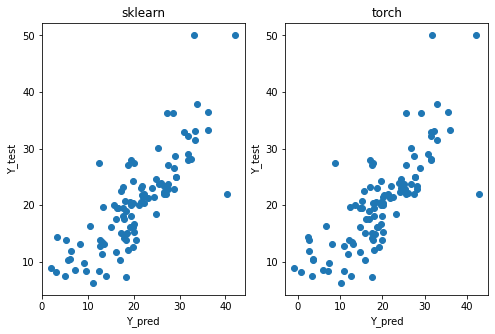

Weight in pytorch:
[[-0.09976371  0.04638611  0.01227133  2.9294977   1.2244105   5.819324
  -0.02434186 -1.0731963   0.22596037 -0.01361042 -0.52638656  0.01400229
  -0.5023356 ]]
Weight in sklearn:
[[-1.0935865e-01  4.1760262e-02  4.9228664e-02  2.7548401e+00
  -1.3742697e+01  4.7124338e+00 -1.1964306e-02 -1.4352252e+00
   2.9867482e-01 -1.2363828e-02 -8.9553994e-01  1.0349565e-02
  -5.2113879e-01]]
bias in pytorch:
[4.1083302]
bias in sklearn:
[27.615011]


In [11]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# training model, and prediction using this trained linear model
reg = LinearRegression()
reg.fit(X_train,Y_train)
output_lr_sk = reg.predict(X_test)
output_lr_sk=np.squeeze(output_lr_sk)
# # the correlation coefficient between predicts  and GTs. 
print('Correlation between preds and gts (Torch): ', np.corrcoef(output_lr, Y_test)[0,1])
print('Correlation between preds and gts (sklearn): ', np.corrcoef(output_lr_sk, Y_test)[0,1])


# whole plot size
plt.figure(figsize=(8, 5))
plt.subplot(1,2,1)
plt.scatter(output_lr_sk, Y_test)
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.title('sklearn')
plt.subplot(1,2,2)
plt.scatter(output_lr, Y_test)
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.title('torch')
plt.show()
print('Weight in pytorch:\n{}'.format(model[0].weight.detach().numpy()))
print('Weight in sklearn:\n{}'.format(reg.coef_))
print('bias in pytorch:\n{}'.format(model[0].bias.detach().numpy()))
print('bias in sklearn:\n{}'.format(reg.intercept_))

## 4. 利用簡單線性回歸的close-form建立模型進行波士頓房價預測 <br>

In [16]:
class LinearRegression_Tommy(object):
    def __init__(self):pass
    def train(self,TrainingData, response):
        x=TrainingData
        y=response
        Ndata=len(y)
        x=np.c_[np.ones([Ndata,1]),x]
        # Beta_hat=pinv(x'*x)*x'*y; % Least square approach
        xt=x.transpose()
        C=np.dot(xt,x)
        p2=np.dot(xt,y)
        Beta_hat=np.dot(np.linalg.pinv(C),p2)

        y_hat=np.dot(x,Beta_hat)
        RMSE=np.sqrt(np.average(np.subtract(y,y_hat)*2))
        self.Beta_hat=Beta_hat 
        self.RMSE=RMSE
        self.y_hat=y_hat

    def inference(self, testingData):
        Beta_hat=self.Beta_hat     
        x=testingData
        Ndata=len(x)
        x=np.c_[np.ones([Ndata,1]),x]
        y_test_hat=np.dot(x,Beta_hat)
        return y_test_hat
LR_Tommy=LinearRegression_Tommy()
LR_Tommy.train(X_train,Y_train)
output_lr_tommy = LR_Tommy.inference(X_test)
output_lr_tommy=np.squeeze(output_lr_tommy)
# # the correlation coefficient between predicts  and GTs. 
print('Correlation between preds and gts (tommy code): ', np.corrcoef(output_lr_tommy, Y_test)[0,1])
print('Weight in sklearn:\n{}'.format(reg.coef_))
print('Weight in tommy code:\n{}'.format(LR_Tommy.Beta_hat[1:].transpose()))
print('bias in sklearn:\n{}'.format(reg.intercept_))
print('bias in tommy code:\n{}'.format(LR_Tommy.Beta_hat[0].transpose()))


Correlation between preds and gts (tommy code):  0.8100602356632274
Weight in sklearn:
[[-1.0935865e-01  4.1760262e-02  4.9228664e-02  2.7548401e+00
  -1.3742697e+01  4.7124338e+00 -1.1964306e-02 -1.4352252e+00
   2.9867482e-01 -1.2363828e-02 -8.9553994e-01  1.0349565e-02
  -5.2113879e-01]]
Weight in tommy code:
[[-1.09358515e-01  4.17604556e-02  4.92276325e-02  2.75483864e+00
  -1.37425427e+01  4.71242634e+00 -1.19656680e-02 -1.43522434e+00
   2.98673891e-01 -1.23637110e-02 -8.95540177e-01  1.03495303e-02
  -5.21139523e-01]]
bias in sklearn:
[27.615011]
bias in tommy code:
[27.61502842]


### 資料做標準化再來進行預測

In [17]:
def load_boston_sklearn():
    X, Y = load_boston(return_X_y=True)
    for i in range(13):
        X[:,i]=(X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2022)
    return  X_train, X_test, Y_train, Y_test

use_cuda=0
device = torch.device("cuda" if use_cuda else "cpu")
# Step 1: data loader
X_train, X_test, Y_train, Y_test = load_boston_sklearn()
X_train = torch.tensor(X_train, dtype=torch.float)
Y_train = torch.tensor(Y_train, dtype=torch.float).view(-1, 1)
mydatasets = torch.utils.data.TensorDataset(X_train, Y_train)
dataloader_train = torch.utils.data.DataLoader(mydatasets, batch_size=50, shuffle=True)
# Step 2: model 
w_num = X_train.shape[1]
model = torch.nn.Sequential(
    torch.nn.Linear(w_num, 1)
)
model=model.to(device)
# step 3: loss function
loss = torch.nn.MSELoss().to(device)
# step4. optimator
optimizer_lr = torch.optim.Adam(model.parameters(), lr=0.01)
# step 5. model training
total_epoch=1000
plt_loss_train=[]
for epoch in range(total_epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(dataloader_train):
        data, target = data.to(device), target.to(device)

        output_lr = model(data)
        loss_lr = loss(output_lr,target) 
        
        optimizer_lr.zero_grad()
        loss_lr.backward()
        optimizer_lr.step()
        
        train_loss += loss_lr.cpu().detach().numpy()
    train_loss /= len(dataloader_train.dataset)
    plt_loss_train.append(train_loss)
    if epoch%50==0:
        print('Linear Regression [epoch: {}/{}], Average loss (Train):{:.10f}'.format(
            epoch+1, total_epoch, train_loss))
print('training done.')
data = torch.FloatTensor(X_test).to(device)
data = torch.unsqueeze(data, 0)
model.eval()
with torch.no_grad():
    output_lr = model(data)
output_lr = torch.squeeze(output_lr)
output_lr = output_lr.cpu().detach().numpy()

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg = LinearRegression()
reg.fit(X_train,Y_train)
output_lr_sk = reg.predict(X_test)
output_lr_sk=np.squeeze(output_lr_sk)

LR_Tommy=LinearRegression_Tommy()
LR_Tommy.train(X_train,Y_train)
output_lr_tommy = LR_Tommy.inference(X_test)
output_lr_tommy=np.squeeze(output_lr_tommy)

# # the correlation coefficient between predicts  and GTs. 
print('Correlation between preds and gts (Torch): ', np.corrcoef(output_lr, Y_test)[0,1])
print('Correlation between preds and gts (sklearn): ', np.corrcoef(output_lr_sk, Y_test)[0,1])
print('Correlation between preds and gts (tommy code): ', np.corrcoef(output_lr_tommy, Y_test)[0,1])




Linear Regression [epoch: 1/1000], Average loss (Train):13.8299820400
Linear Regression [epoch: 51/1000], Average loss (Train):8.2230869709
Linear Regression [epoch: 101/1000], Average loss (Train):4.8258296476
Linear Regression [epoch: 151/1000], Average loss (Train):2.9797739274
Linear Regression [epoch: 201/1000], Average loss (Train):1.7456936506
Linear Regression [epoch: 251/1000], Average loss (Train):1.0777523588
Linear Regression [epoch: 301/1000], Average loss (Train):0.7852023545
Linear Regression [epoch: 351/1000], Average loss (Train):0.5133023362
Linear Regression [epoch: 401/1000], Average loss (Train):0.5780767804
Linear Regression [epoch: 451/1000], Average loss (Train):0.4384769898
Linear Regression [epoch: 501/1000], Average loss (Train):0.4494855333
Linear Regression [epoch: 551/1000], Average loss (Train):0.4437203761
Linear Regression [epoch: 601/1000], Average loss (Train):0.4526928769
Linear Regression [epoch: 651/1000], Average loss (Train):0.4335348712
Linear R

## 5. 利用pytorch建立MLP進行波士頓房價預測 <br>

In [19]:
# Step 2: model 
w_num = X_train.shape[1]
model = torch.nn.Sequential(
    torch.nn.Linear(w_num, 26),
    torch.nn.Sigmoid(),
    torch.nn.Linear(26, 13),
    torch.nn.Sigmoid(),
    torch.nn.Linear(13, 1)
)
model=model.to(device)
# step 3: loss function
loss = torch.nn.MSELoss().to(device)
# step4. optimator
optimizer_lr = torch.optim.Adam(model.parameters(), lr=0.01)
# step 5. model training
total_epoch=1000
plt_loss_train=[]
for epoch in range(total_epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(dataloader_train):
        data, target = data.to(device), target.to(device)

        output_lr = model(data)
        loss_lr = loss(output_lr,target) 
        
        optimizer_lr.zero_grad()
        loss_lr.backward()
        optimizer_lr.step()
        
        train_loss += loss_lr.cpu().detach().numpy()
    train_loss /= len(dataloader_train.dataset)
    plt_loss_train.append(train_loss)
    if epoch%50==0:
        print('Linear Regression [epoch: {}/{}], Average loss (Train):{:.10f}'.format(
            epoch+1, total_epoch, train_loss))
print('training done.')
data = torch.FloatTensor(X_test).to(device)
data = torch.unsqueeze(data, 0)
model.eval()
with torch.no_grad():
    output_lr = model(data)
output_lr = torch.squeeze(output_lr)
output_lr = output_lr.cpu().detach().numpy()
print('Correlation between preds and gts (Torch): ', np.corrcoef(output_lr, Y_test)[0,1])


Linear Regression [epoch: 1/1000], Average loss (Train):13.3511500595
Linear Regression [epoch: 51/1000], Average loss (Train):0.7809644170
Linear Regression [epoch: 101/1000], Average loss (Train):0.2786836270
Linear Regression [epoch: 151/1000], Average loss (Train):0.1289796151
Linear Regression [epoch: 201/1000], Average loss (Train):0.1099080679
Linear Regression [epoch: 251/1000], Average loss (Train):0.0792776172
Linear Regression [epoch: 301/1000], Average loss (Train):0.0612796778
Linear Regression [epoch: 351/1000], Average loss (Train):0.0911297423
Linear Regression [epoch: 401/1000], Average loss (Train):0.0445051728
Linear Regression [epoch: 451/1000], Average loss (Train):0.0428762805
Linear Regression [epoch: 501/1000], Average loss (Train):0.0359798333
Linear Regression [epoch: 551/1000], Average loss (Train):0.0317003253
Linear Regression [epoch: 601/1000], Average loss (Train):0.0310359712
Linear Regression [epoch: 651/1000], Average loss (Train):0.0278718399
Linear R